# Sales Analysis   

In [1]:
import pandas as pd 

import numpy as np

import matplotlib.pyplot as plt 
%matplotlib inline 

import seaborn as sns 

In [80]:
data = pd.read_excel('sales_seaborn.xls')
data.head()

,Row ID,Order ID,Order Date,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,Unit Price,...,Customer Name,Province,Region,Customer Segment,Product Category,Product Sub-Category,Product Name,Product Container,Product Base Margin,Ship Date
0,1,3,2010-10-13,Low,6,261.5400,0.04,Regular Air,-213.2500,38.94,...,Muhammed MacIntyre,Nunavut,Nunavut,Small Business,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",Large Box,0.80,2010-10-20
1,49,293,2012-10-01,High,49,10123.0200,0.07,Delivery Truck,457.8100,208.16,...,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",Jumbo Drum,0.58,2012-10-02
2,50,293,2012-10-01,High,27,244.5700,0.01,Regular Air,46.7075,8.69,...,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Binders and Binder Accessories,"Cardinal Slant-D® Ring Binder, Heavy Gauge Vinyl",Small Box,0.39,2012-10-03
3,80,483,2011-07-10,High,30,4965.7595,0.08,Regular Air,1198.9710,195.99,...,Clay Rozendal,Nunavut,Nunavut,Corporate,Technology,Telephones and Communication,R380,Small Box,0.58,2011-07-12
4,85,515,2010-08-28,Not Specified,19,394.2700,0.08,Regular Air,30.9400,21.78,...,Carlos Soltero,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,Holmes HEPA Air Purifier,Medium Box,0.50,2010-08-30


In [3]:
data.columns 

Index(['Row ID', 'Order ID', 'Order Date', 'Order Priority', 'Order Quantity',
       'Sales', 'Discount', 'Ship Mode', 'Profit', 'Unit Price',
       'Shipping Cost', 'Customer Name', 'Province', 'Region',
       'Customer Segment', 'Product Category', 'Product Sub-Category',
       'Product Name', 'Product Container', 'Product Base Margin',
       'Ship Date'],
      dtype='object')

# handling the missing values  

In [7]:
data.isna().sum() # data is very much fit for analysis 

Row ID                   0
Order ID                 0
Order Date               0
Order Priority           0
Order Quantity           0
Sales                    0
Discount                 0
Ship Mode                0
Profit                   0
Unit Price               0
Shipping Cost            0
Customer Name            0
Province                 0
Region                   0
Customer Segment         0
Product Category         0
Product Sub-Category     0
Product Name             0
Product Container        0
Product Base Margin     63
Ship Date                0
dtype: int64

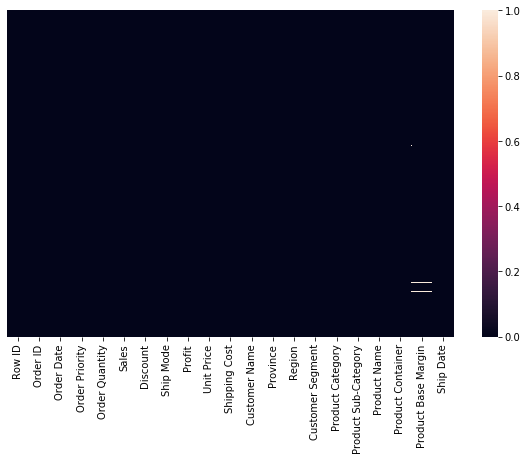

In [12]:
plt.figure(figsize = (10,6))
sns.heatmap(data.isna(),     yticklabels=False)

# Analyse the total no. orders for each kind of Order Priority  

In [14]:
data['Order Priority'].value_counts()

High             1768
Low              1720
Not Specified    1672
Medium           1631
Critical         1608
Name: Order Priority, dtype: int64

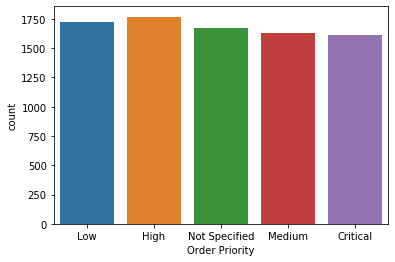

In [13]:
sns.countplot(data['Order Priority'])

##### we can see that most of the priority have same frequency  

# analyse the total sale done by each kind of orde priority  

In [15]:
data.groupby('Order Priority').sum()[['Sales']]

,Sales
Order Priority,
Critical,2.724799e+06
High,3.267356e+06
Low,3.282630e+06
Medium,2.862452e+06
Not Specified,2.778363e+06


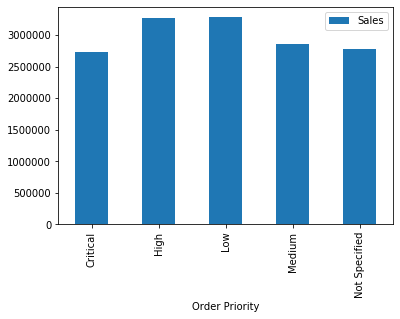

In [16]:
data.groupby('Order Priority').sum()[['Sales']].plot(kind = 'bar')

##### maximum sales is done by those category which have high and low priority of order 
##### the the difference of maximum sale is not that much high 

# for each kind of order priority , find the average discount provided  

In [17]:
data.groupby('Order Priority').mean().Discount

Order Priority
Critical         0.049876
High             0.049446
Low              0.050366
Medium           0.050202
Not Specified    0.048481
Name: Discount, dtype: float64

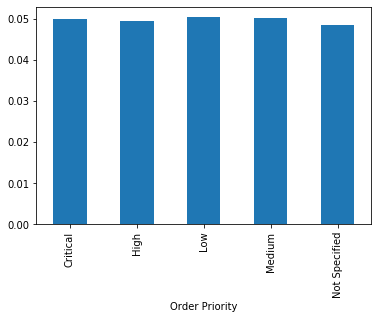

In [18]:
data.groupby('Order Priority').mean().Discount.plot.bar()

##### we cansee over here that for each kind of order priority we have approximately same amount of discount  

In [19]:
data.head(3)

,Row ID,Order ID,Order Date,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,Unit Price,...,Customer Name,Province,Region,Customer Segment,Product Category,Product Sub-Category,Product Name,Product Container,Product Base Margin,Ship Date
0,1,3,2010-10-13,Low,6,261.54,0.04,Regular Air,-213.2500,38.94,...,Muhammed MacIntyre,Nunavut,Nunavut,Small Business,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",Large Box,0.80,2010-10-20
1,49,293,2012-10-01,High,49,10123.02,0.07,Delivery Truck,457.8100,208.16,...,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",Jumbo Drum,0.58,2012-10-02
2,50,293,2012-10-01,High,27,244.57,0.01,Regular Air,46.7075,8.69,...,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Binders and Binder Accessories,"Cardinal Slant-D® Ring Binder, Heavy Gauge Vinyl",Small Box,0.39,2012-10-03


In [20]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Order Priority', 'Order Quantity',
       'Sales', 'Discount', 'Ship Mode', 'Profit', 'Unit Price',
       'Shipping Cost', 'Customer Name', 'Province', 'Region',
       'Customer Segment', 'Product Category', 'Product Sub-Category',
       'Product Name', 'Product Container', 'Product Base Margin',
       'Ship Date'],
      dtype='object')

# Analyse the shipping cost for each kind of order priority 

In [22]:
data.groupby('Order Priority').mean()[['Shipping Cost']]

,Shipping Cost
Order Priority,
Critical,13.129776
High,12.819808
Low,13.341198
Medium,12.577517
Not Specified,12.315879


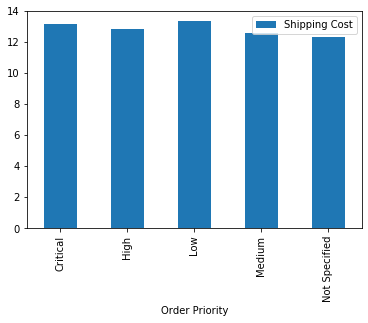

In [23]:
data.groupby('Order Priority').mean()[['Shipping Cost']].plot.bar()

##### for each kind of order priority we have same amount of shipping cost ( AVG ) 

# analyse the order priority according to the shpping mode 
#### i.e we wantto know that which kind of order priority has been shipped through which mode 

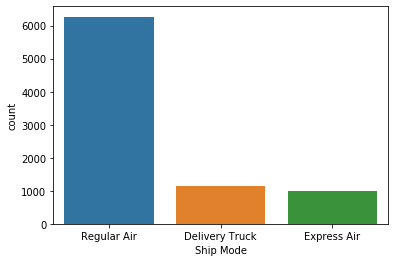

In [30]:
sns.countplot(data['Ship Mode'])

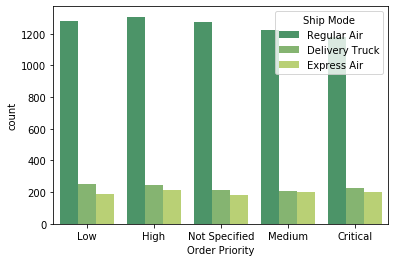

In [32]:
sns.countplot(data['Order Priority'], hue = data['Ship Mode'], palette = 'summer')

##### we can see that , in all of the order priority , product has been shipped through 'regular air' mostly 

# analyse from which order priority we get the maximum number quantiy

3

In [37]:
data.groupby('Order Priority').sum()[['Order Quantity']]

,Order Quantity
Order Priority,
Critical,40740
High,45675
Low,44371
Medium,41364
Not Specified,42627


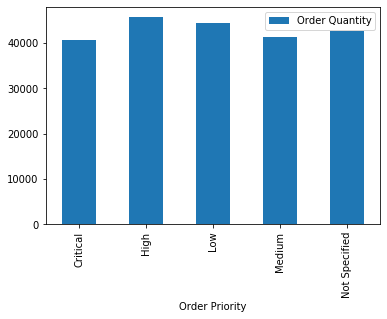

In [39]:
data.groupby('Order Priority').sum()[['Order Quantity']].plot.bar()

# in which month do we have maximum numbers of order  

In [84]:
result = data.set_index('Order Date')
result = pd.DataFrame(result['Order Quantity'].resample('M').sum())
result 

,Order Quantity
Order Date,
2009-01-31,5552
2009-02-28,4027
2009-03-31,4258
2009-04-30,4512
2009-05-31,4829
2009-06-30,4176
2009-07-31,4815
2009-08-31,4880
2009-09-30,4805


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]),
 <a list of 48 Text xticklabel objects>)

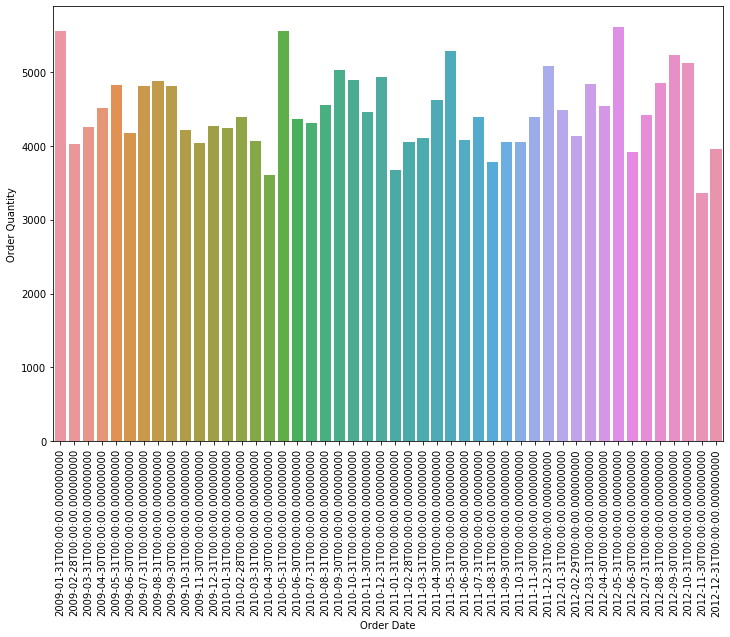

In [87]:
plt.figure(figsize= (12,8))
sns.barplot(result.index, result['Order Quantity'])
plt.xticks(rotation = 'vertical')

### another way  

In [89]:
result = data.copy()
result.head(2)

,Row ID,Order ID,Order Date,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,Unit Price,...,Customer Name,Province,Region,Customer Segment,Product Category,Product Sub-Category,Product Name,Product Container,Product Base Margin,Ship Date
0,1,3,2010-10-13,Low,6,261.54,0.04,Regular Air,-213.25,38.94,...,Muhammed MacIntyre,Nunavut,Nunavut,Small Business,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",Large Box,0.80,2010-10-20
1,49,293,2012-10-01,High,49,10123.02,0.07,Delivery Truck,457.81,208.16,...,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",Jumbo Drum,0.58,2012-10-02


In [104]:
result['Month'] = data['Order Date'].dt.month
result['Year'] = data['Order Date'].dt.year

In [105]:
result.Month.value_counts().sort_index()

1     716
2     652
3     697
4     672
5     778
6     649
7     699
8     705
9     735
10    730
11    645
12    721
Name: Month, dtype: int64

Text(0, 0.5, 'quantity')

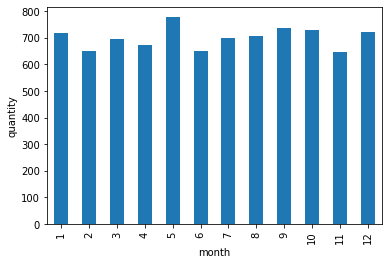

In [106]:
result.Month.value_counts().sort_index().plot.bar()
plt.xlabel('month')
plt.ylabel('quantity')


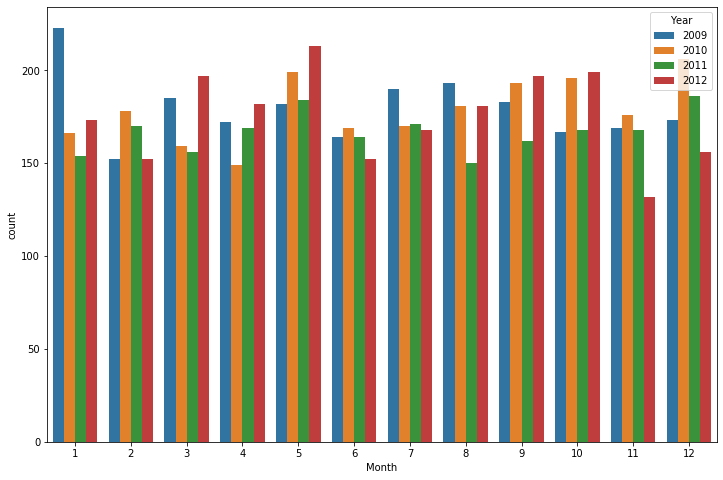

In [118]:
plt.figure(figsize = (12,8))
sns.countplot(result['Month'], hue = result['Year'])

# analyse the total no. of sale by each month  

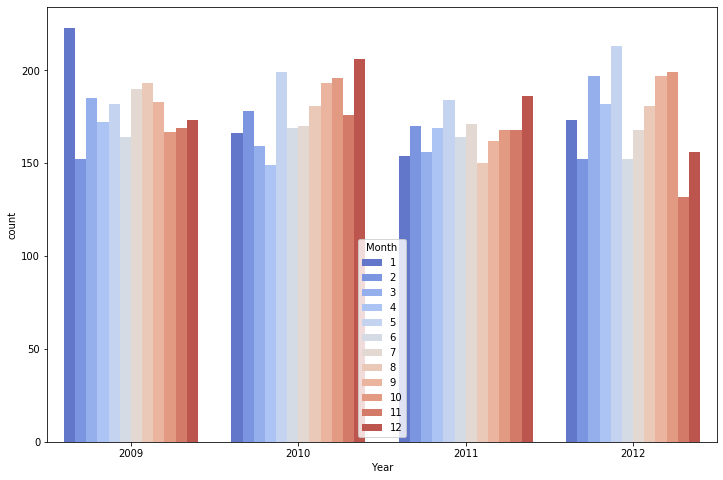

In [124]:
plt.figure(figsize = (12,8))
sns.countplot(result['Year'], hue = result['Month'], palette = 'coolwarm')

# analyse whether the sales is increasing or decreasing by the time 

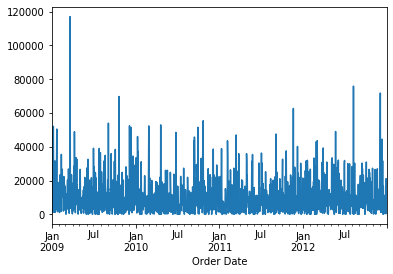

In [134]:
result = data.set_index('Order Date')
result['Sales'].resample('D').sum().plot()
# can't say anything about the grouph 

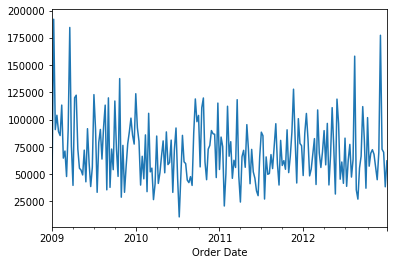

In [135]:
result['Sales'].resample('W').sum().plot() # still can't say anything about the graph 

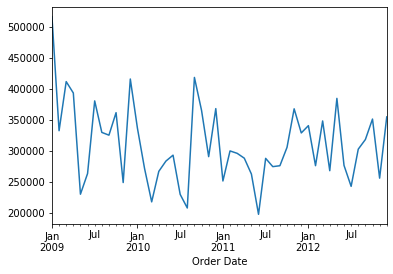

In [136]:
result['Sales'].resample('M').sum().plot() # still can't say anything about the graph 

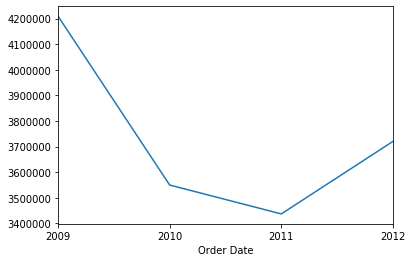

In [137]:
result['Sales'].resample('Y').sum().plot()

#### by looking at the graph we can see that from 2009 to 2011 sales has been dixreased , but after 2011 sales uhas been increased  

# analyse the profit for each month  

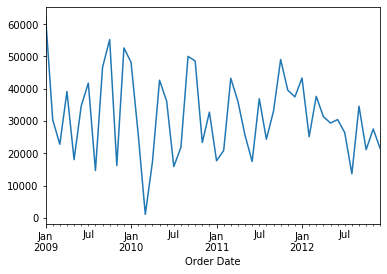

In [140]:
result = data.set_index('Order Date')
result['Profit'].resample('M').sum().plot()

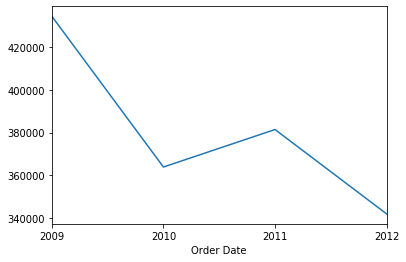

In [142]:
result['Profit'].resample('Y').sum().plot()

#### we can see that profit has been decreased as the sales also decreases  

#### another way 

In [141]:
data['Month'] = data['Order Date'].dt.month
data['Year'] = data['Order Date'].dt.year

In [144]:
result = data.groupby('Month').sum()[['Profit']]
result 

,Profit
Month,
1,171520.736766
2,102429.163820
3,104799.329802
4,123906.477028
5,115628.718301
6,118703.604153
7,120965.299995
8,74585.479370
9,164352.688135


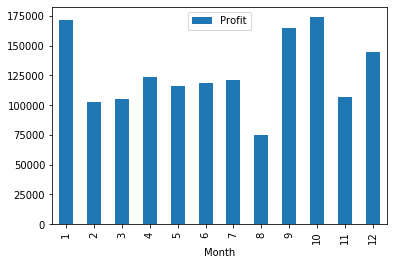

In [145]:
result.plot.bar()

In [146]:
result = data.groupby('Year').sum()[['Profit']]
result 

,Profit
Year,
2009,434538.785435
2010,363871.378527
2011,381455.986224
2012,341901.809395


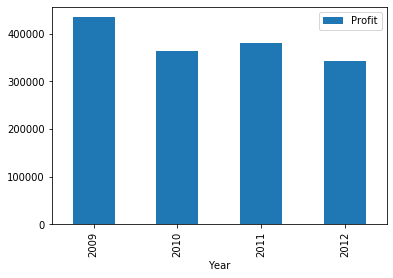

In [148]:
result.plot.bar()

In [149]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Order Priority', 'Order Quantity',
       'Sales', 'Discount', 'Ship Mode', 'Profit', 'Unit Price',
       'Shipping Cost', 'Customer Name', 'Province', 'Region',
       'Customer Segment', 'Product Category', 'Product Sub-Category',
       'Product Name', 'Product Container', 'Product Base Margin', 'Ship Date',
       'Month', 'Year'],
      dtype='object')

# analyse the total number of order according to each region  

In [150]:
data.Region.value_counts()

West                     1991
Ontario                  1826
Prarie                   1706
Atlantic                 1080
Quebec                    781
Yukon                     542
Northwest Territories     394
Nunavut                    79
Name: Region, dtype: int64

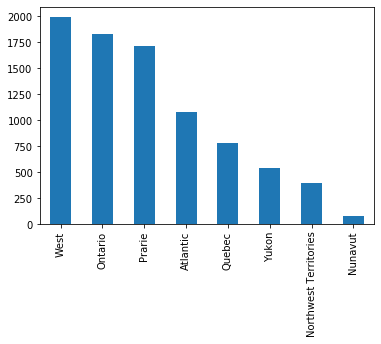

In [152]:
data.Region.value_counts().plot.bar()

# analyse the total sale for each region 

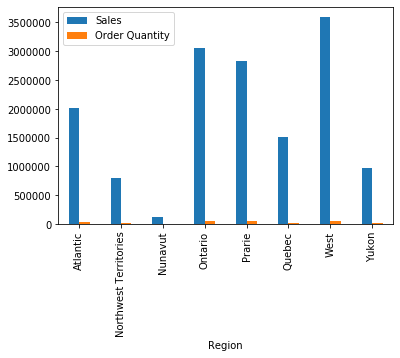

In [171]:
result = data.groupby('Region').sum()[['Sales','Order Quantity']]
result.plot.bar()

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

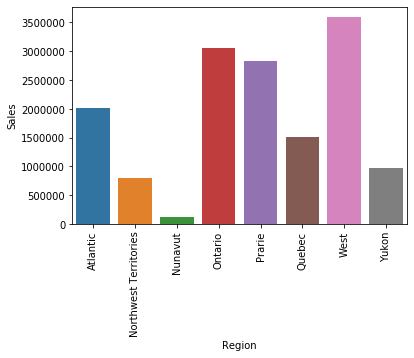

In [170]:
sns.barplot(result.index, result['Sales'])
plt.xticks(rotation = 'vertical')

In [172]:
data.columns 

Index(['Row ID', 'Order ID', 'Order Date', 'Order Priority', 'Order Quantity',
       'Sales', 'Discount', 'Ship Mode', 'Profit', 'Unit Price',
       'Shipping Cost', 'Customer Name', 'Province', 'Region',
       'Customer Segment', 'Product Category', 'Product Sub-Category',
       'Product Name', 'Product Container', 'Product Base Margin', 'Ship Date',
       'Month', 'Year'],
      dtype='object')